### Importing the basic libraries

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

### loading the dataset

In [3]:
house= pd.read_csv('train.csv')

In [4]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data understanding

In [5]:
house.shape

(1460, 81)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#lets loook at the missing value percentage
round(100*house.isnull().sum()/len(house.index),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

In [9]:
#columns with morethan 45% missing value
house.columns[100*house.isnull().sum()/len(house.index)>45]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

### Missing value treatment

In [10]:
# based on data dictionary na in PoolQC means 'No Pool'
house.loc[house['PoolQC'].isnull(),['PoolQC']] = 'No Pool'
# based on data dictionary na in Fence means 'No Fence'
house.loc[house['Fence'].isnull(),['Fence']] = 'No Fence'
# based on data dictionary na in MiscFeature means 'none'
house.loc[house['MiscFeature'].isnull(),['MiscFeature']] = 'none'

In [11]:
# based on data dictionary na in Alley means 'No alley access'
house.loc[house['Alley'].isnull(),['Alley']] = 'No alley access'
# based on data dictionary na in FireplaceQu means 'No Fireplace'
house.loc[house['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'

In [12]:
# based on data dictionary na in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 means ''No Basement'
house.loc[house['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
house.loc[house['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
house.loc[house['BsmtExposure'].isnull(),['BsmtExposure']] = "No Basement"
house.loc[house['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
house.loc[house['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'

In [13]:
# based on data dictionary na in MasVnrType means 'none'
house.loc[house['MasVnrType'].isnull(),['MasVnrType']] = 'none'
# based on data dictionary where MasVnrType type is 'none' area will 0
house.loc[house['MasVnrArea'].isnull(),['MasVnrArea']] = 0

In [14]:
100*house['LotFrontage'].isnull().sum()/len(house.index)
#replacing the missing values with mean
house["LotFrontage"].replace(np.nan, house["LotFrontage"].mean(),inplace=True)

In [15]:
# based on data dictionary na in GarageType,GarageFinish,GarageQual,GarageCond means 'No Garage'
house.loc[house['GarageType'].isnull(),['GarageType']] = 'No Garage'
house.loc[house['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
house.loc[house['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
house.loc[house['GarageCond'].isnull(),['GarageCond']] = 'No Garage'

In [16]:
# replacing with mode value of the column
house.loc[house['Electrical'].isnull(),['Electrical']] = "SBrkr"

In [17]:
# impute GarageYrBlt with 2019 so that while calculating age it will it will turn to 0
# age = 2019-2019 = 0
house.loc[house['GarageYrBlt'].isnull(),['GarageYrBlt']] = 2019

In [18]:
#lets again look if there are any columns
house.columns[100*house.isnull().sum()/len(house.index)>0]

Index([], dtype='object')

In [19]:
house.shape

(1460, 81)

In [20]:
#drop duplicates if any
house=house.drop_duplicates()
house.shape

(1460, 81)

In [21]:
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:
#lets drop the ID column as it is redundant in model builiding
house.drop(['Id'],axis=1,inplace=True)

In [23]:
##Derived variables from the dataset
#New variable creation TotalSF i.e combination of TotalBsmtSF, 1stFlrSF, 2ndFlrSF
house['TotalSF'] = house['TotalBsmtSF'] + house['1stFlrSF'] + house['2ndFlrSF']
#house["house_age_when_sold_in_month"] = (((house["YrSold"]-1) - house["YearBuilt"])*12) + house["MoSold"]
# derive house age = 2019 - year build
house["house_age"] = 2019 - house["YearBuilt"]
# derive garage age = 2019 - year build
house["garage_age"] = 2019 - house["GarageYrBlt"]
# derive gap b/w house build and remodel = YearRemodAdd - year build
house["gap_between_build_remodel"] = house["YearRemodAdd"] - house["YearBuilt"]

In [24]:
#converting to correct datatype for some variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['YrSold'] = house['YrSold'].astype('object')
house['MoSold'] = house['MoSold'].astype('object')

In [25]:
#dividing the variables to numeric and categorical
house_numeric=house.select_dtypes(include=['float64','int64'])
house_numeric.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,house_age,garage_age,gap_between_build_remodel
0,65.0,8450,7,2003,2003,196.0,706,0,150,856,...,0,0,0,0,0,208500,2566,16,16.0,0
1,80.0,9600,6,1976,1976,0.0,978,0,284,1262,...,0,0,0,0,0,181500,2524,43,43.0,0
2,68.0,11250,7,2001,2002,162.0,486,0,434,920,...,0,0,0,0,0,223500,2706,18,18.0,1
3,60.0,9550,7,1915,1970,0.0,216,0,540,756,...,272,0,0,0,0,140000,2473,104,21.0,55
4,84.0,14260,8,2000,2000,350.0,655,0,490,1145,...,0,0,0,0,0,250000,3343,19,19.0,0


In [26]:
house_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'TotalSF',
       'house_age', 'garage_age', 'gap_between_build_remodel'],
      dtype='object')

In [27]:
house_categorical=house.select_dtypes(include=['object'])
house_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [28]:
print(len(house_categorical.columns))
print(len(house_numeric.columns))

47
37


In [29]:
# correlation matrix
corr = house_numeric.corr()
corr

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,house_age,garage_age,gap_between_build_remodel
LotFrontage,1.000000,0.306795,0.234196,0.117598,0.082746,0.178699,0.215828,0.043340,0.122156,0.363358,...,0.009790,0.062335,0.037684,0.180868,0.001168,0.334901,0.427397,-0.117598,-0.025036,-0.075316
LotArea,0.306795,1.000000,0.105806,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,0.307234,-0.014228,0.049824,-0.005926
OverallQual,0.234196,0.105806,1.000000,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,...,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,0.668155,-0.572323,-0.388760,-0.241731
YearBuilt,0.117598,0.014228,0.572323,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,...,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.522897,0.347133,-1.000000,-0.644784,-0.733896
YearRemodAdd,0.082746,0.013788,0.550684,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,...,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.507101,0.342873,-0.592855,-0.535542,0.111922
MasVnrArea,0.178699,0.103321,0.407252,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,...,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,0.444454,-0.311600,-0.186427,-0.235602
BsmtFinSF1,0.215828,0.214103,0.239666,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,...,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,0.415843,-0.249503,-0.101284,-0.199531
BsmtFinSF2,0.043340,0.111170,-0.059119,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,...,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.048916,0.049107,0.095592,0.003443
BsmtUnfSF,0.122156,-0.002618,0.308159,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,...,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,0.373733,-0.149040,-0.161719,-0.031127
TotalBsmtSF,0.363358,0.260833,0.537808,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,...,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,0.826742,-0.391452,-0.233034,-0.237527


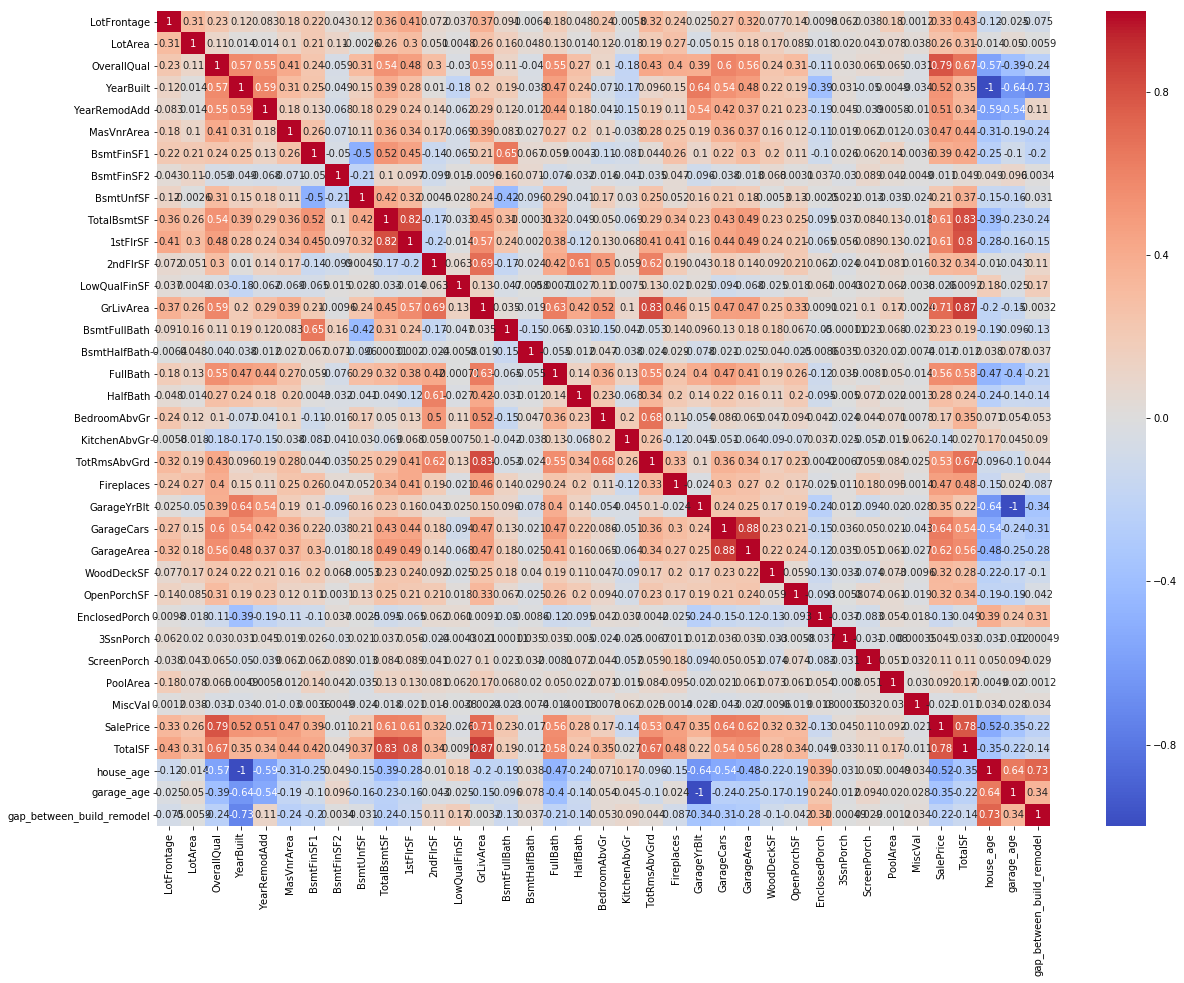

In [30]:
# plotting a heatmap
plt.figure(figsize = (20, 15))
# heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

<Figure size 2880x2160 with 0 Axes>

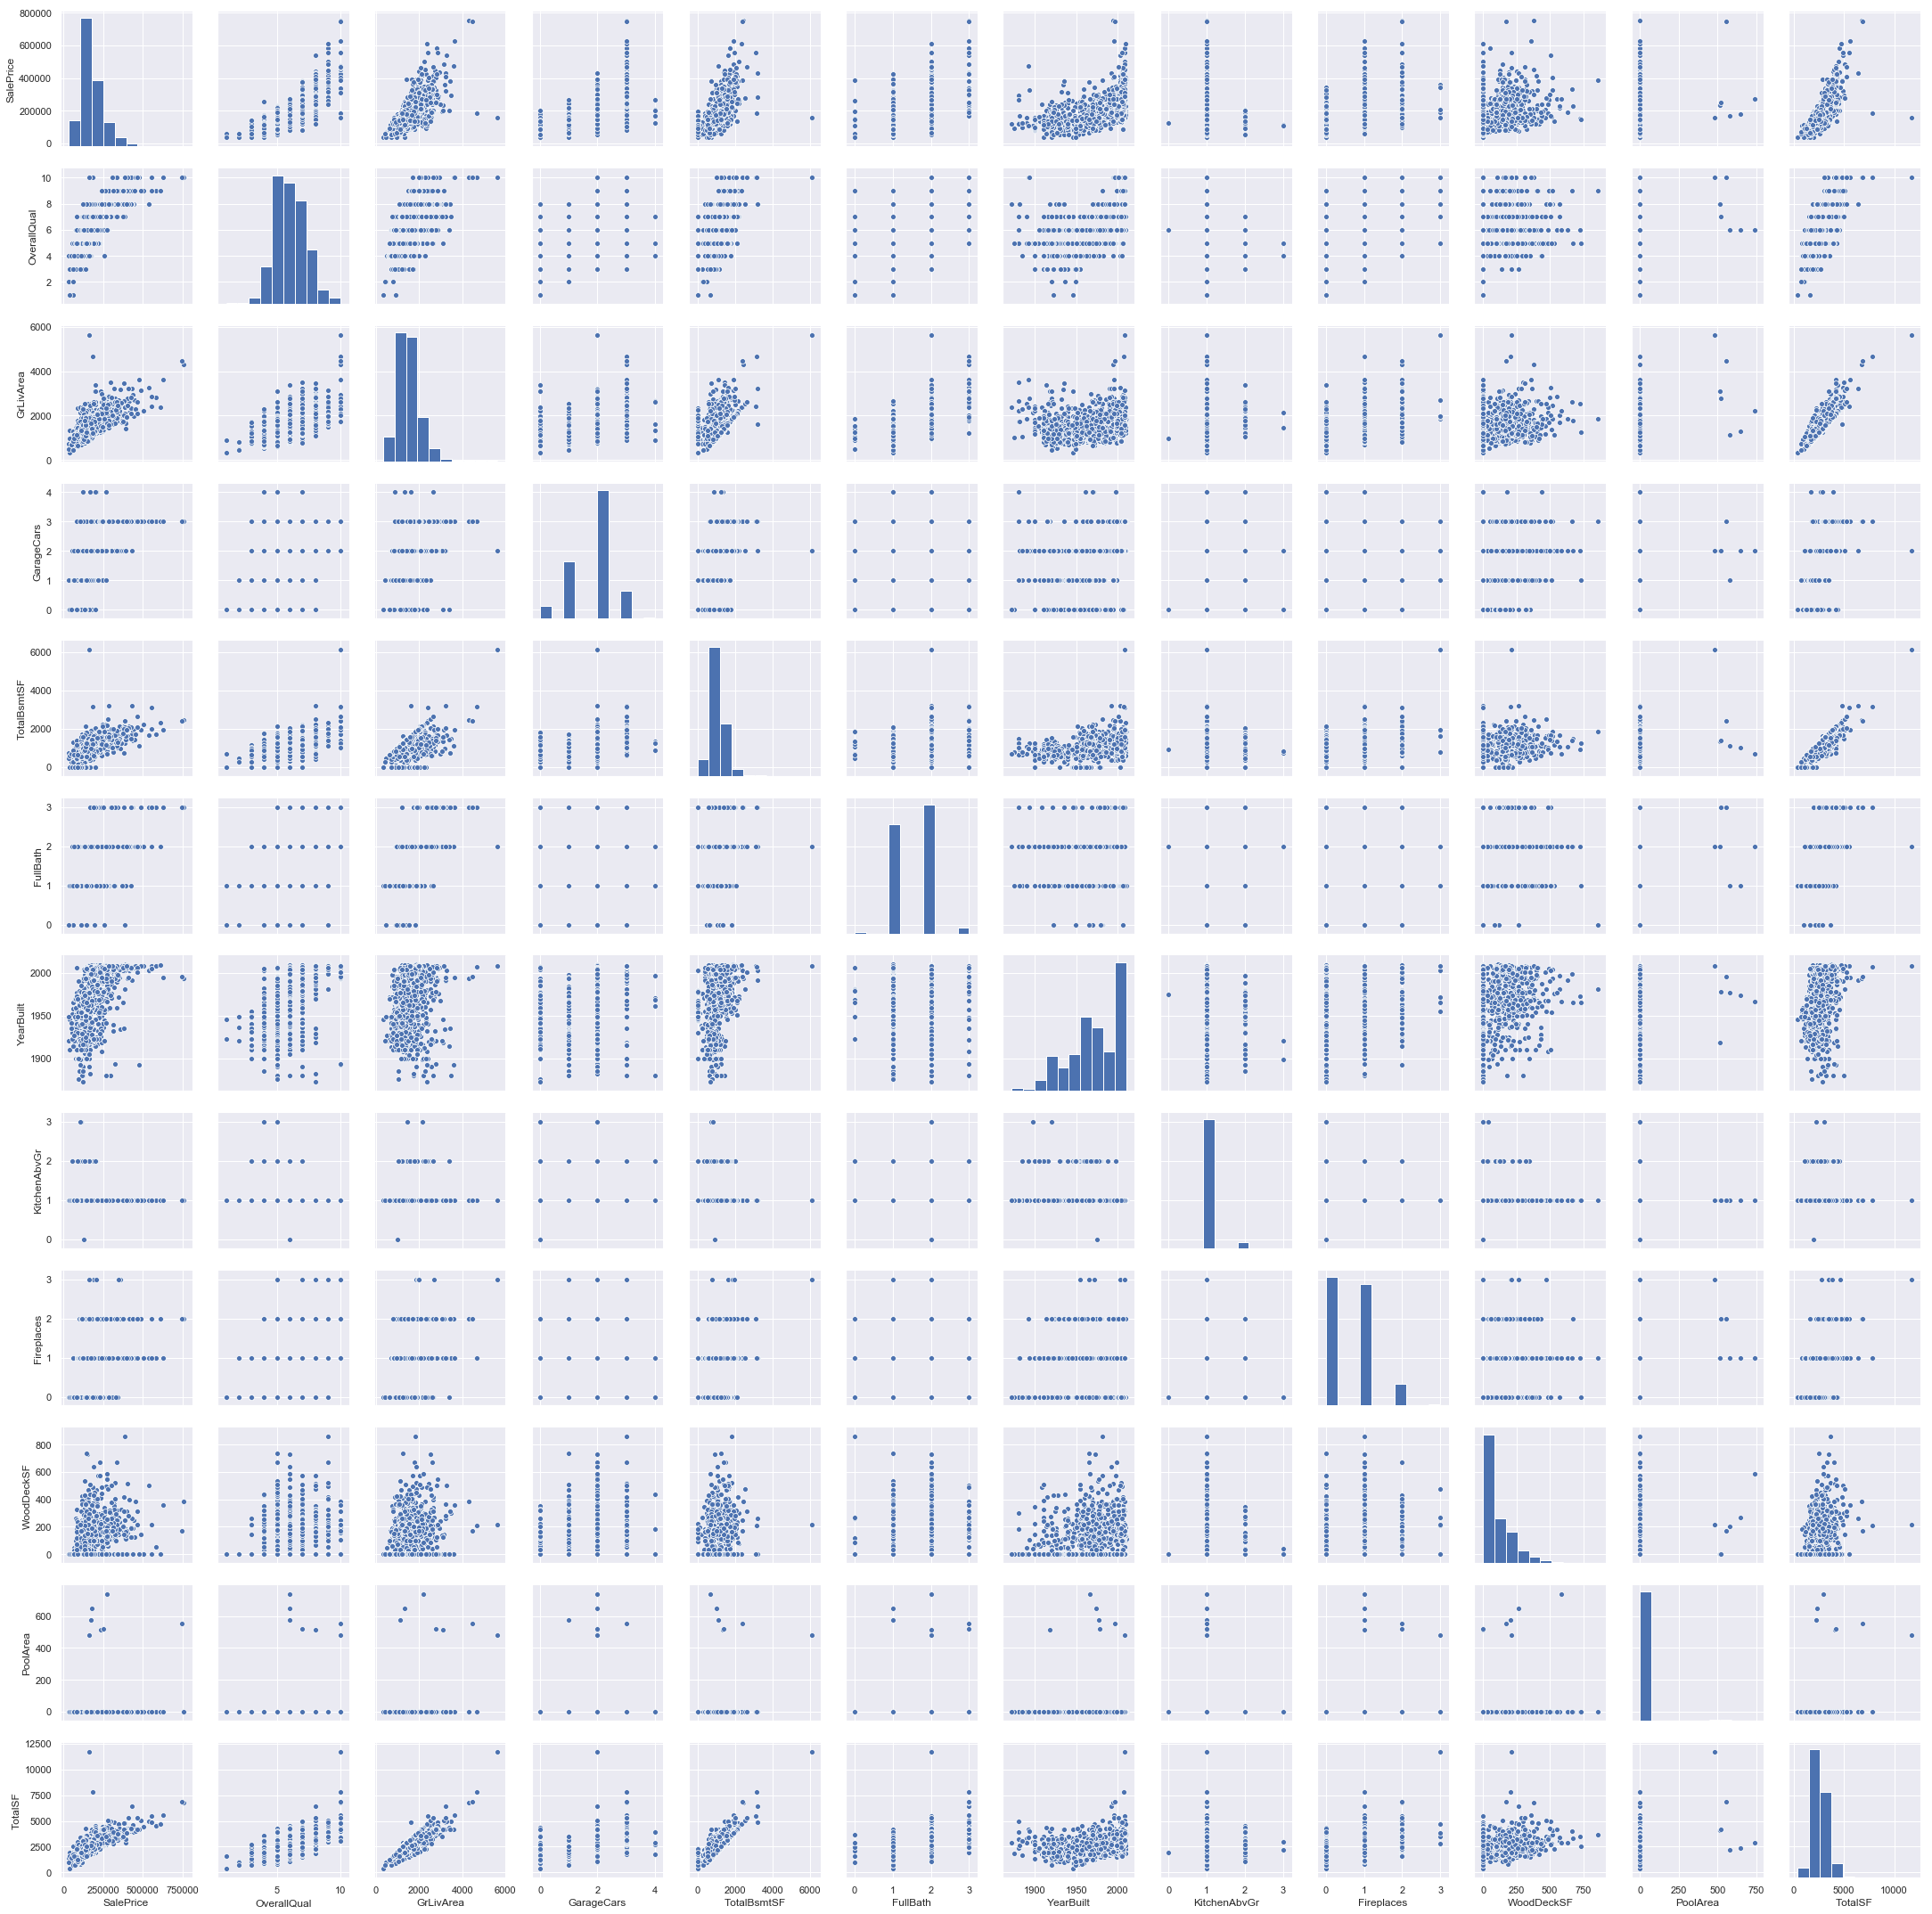

In [31]:
#plotting scatter plot for some of the numeric variables
sns.set()
plt.figure(figsize=(40, 30))
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt',
        'KitchenAbvGr','Fireplaces','WoodDeckSF','PoolArea','TotalSF']
sns.pairplot(house[cols], size = 2.5)
plt.show();

### Univariate analysis

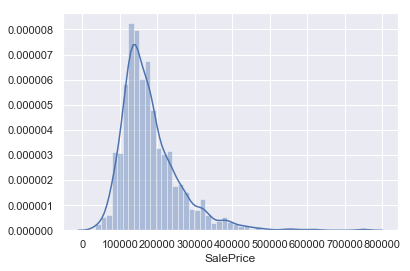

In [32]:
#distplot of the target variables
sns.distplot(house['SalePrice'])

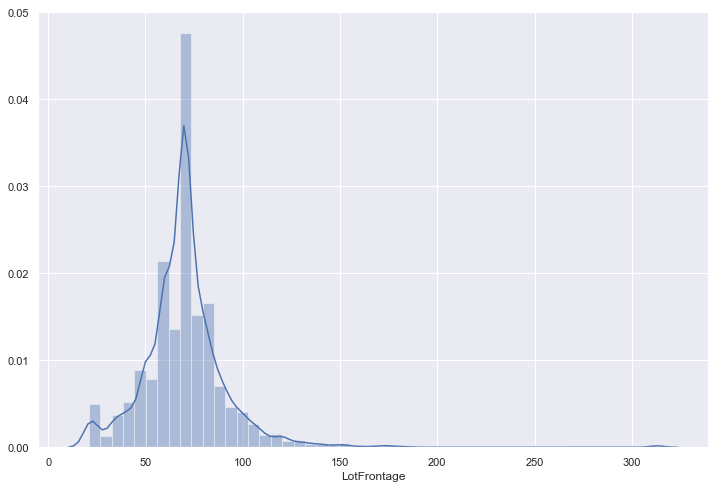

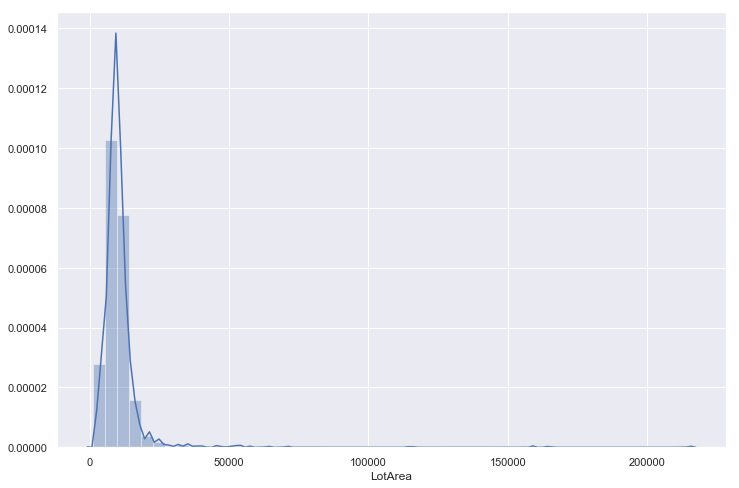

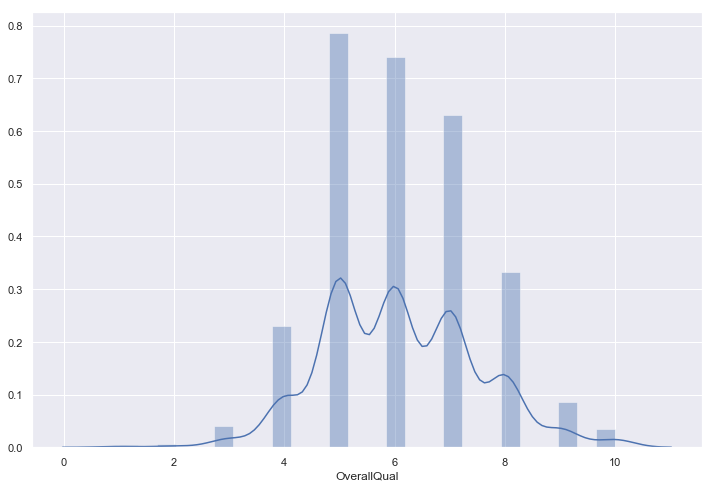

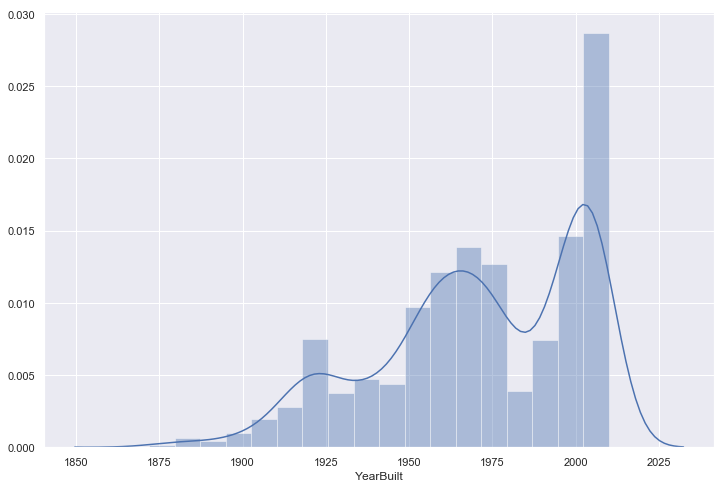

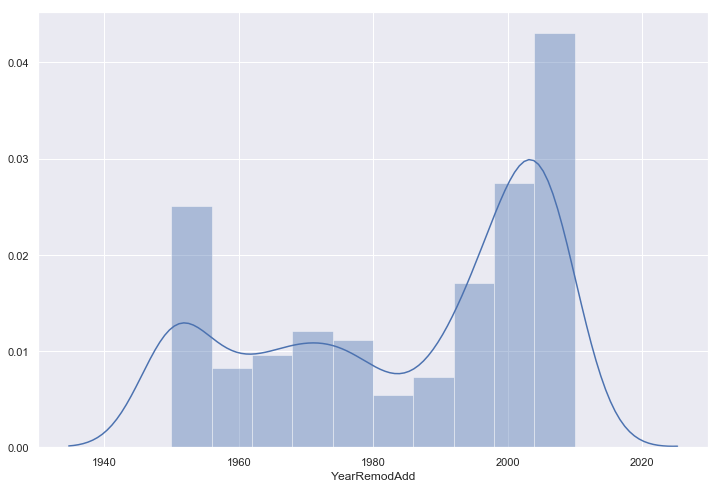

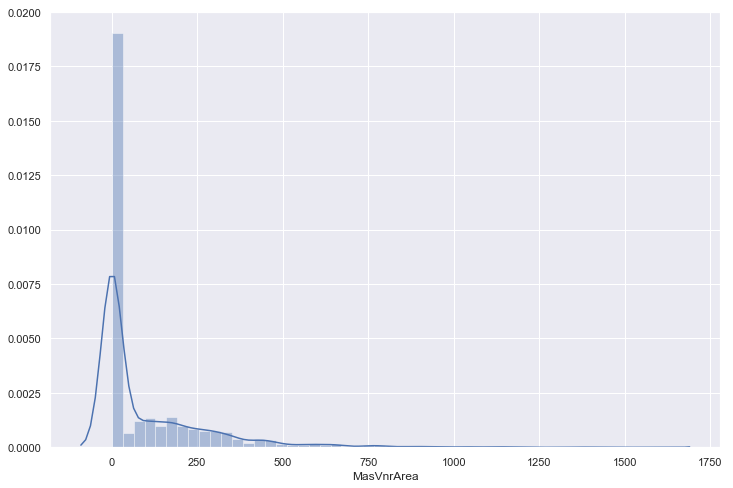

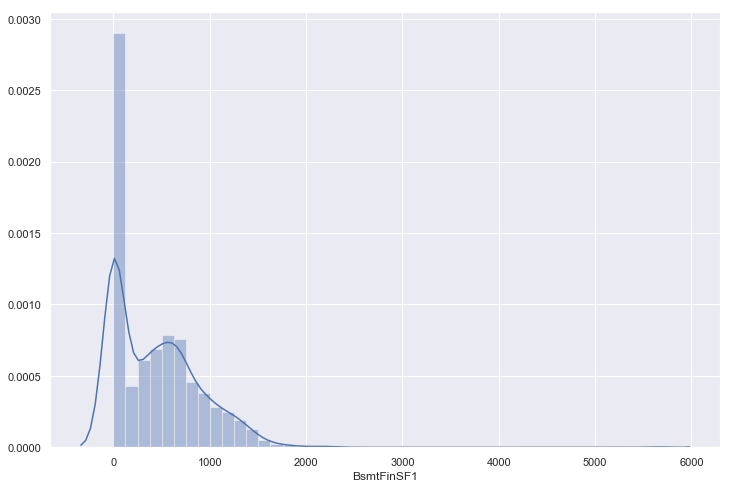

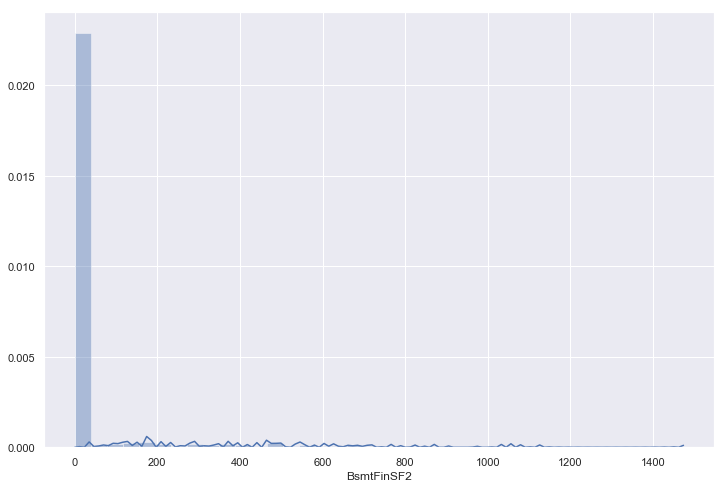

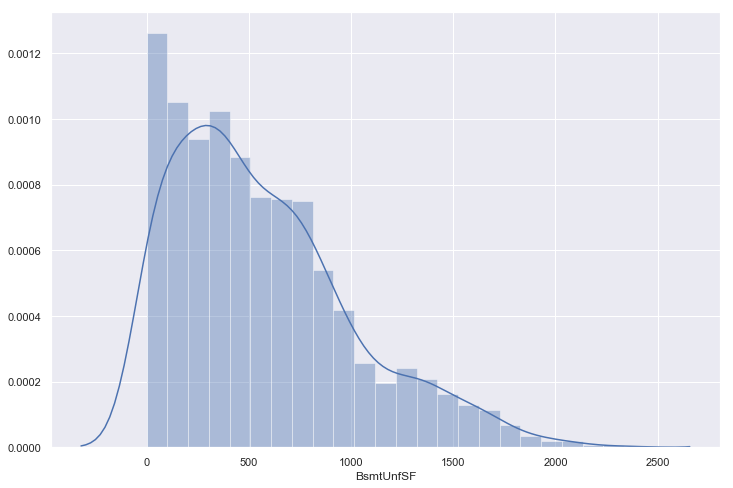

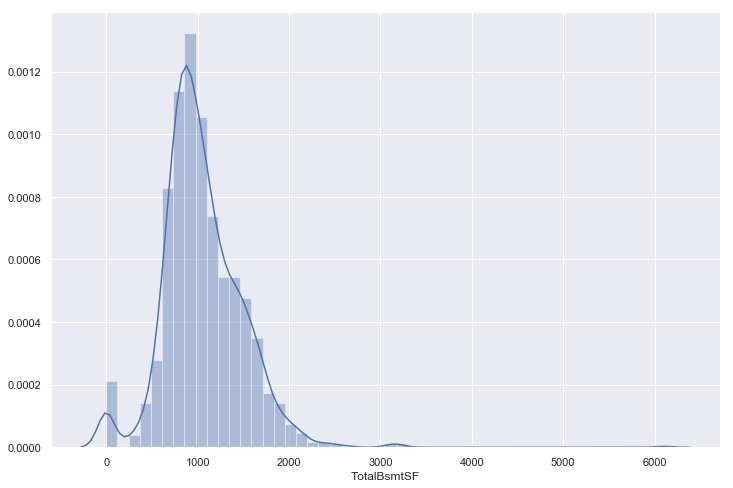

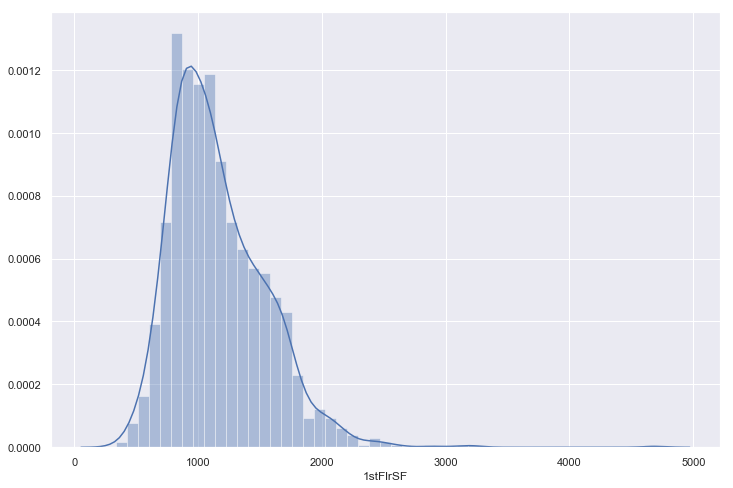

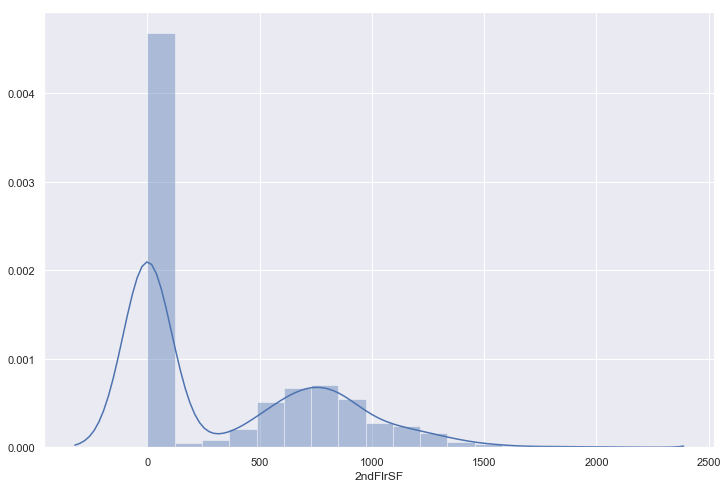

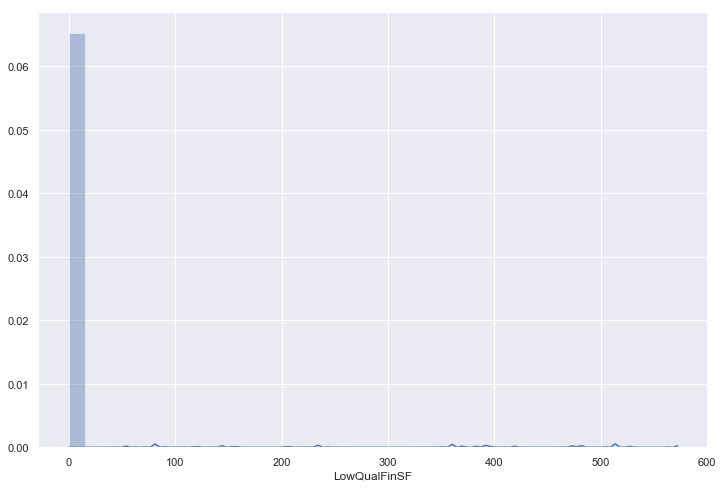

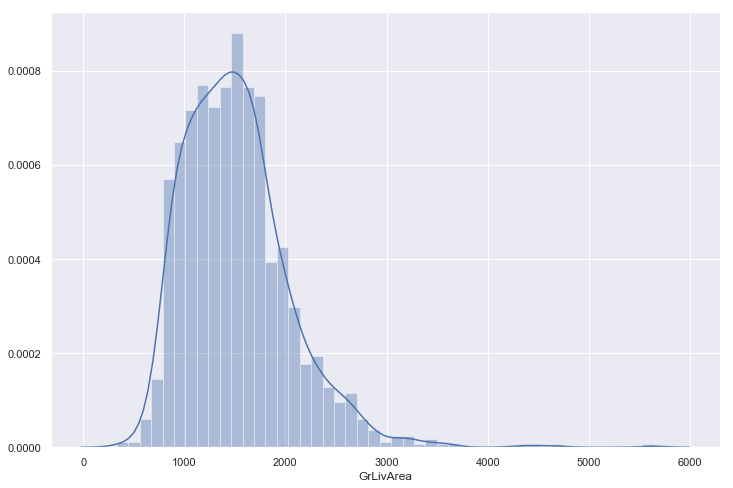

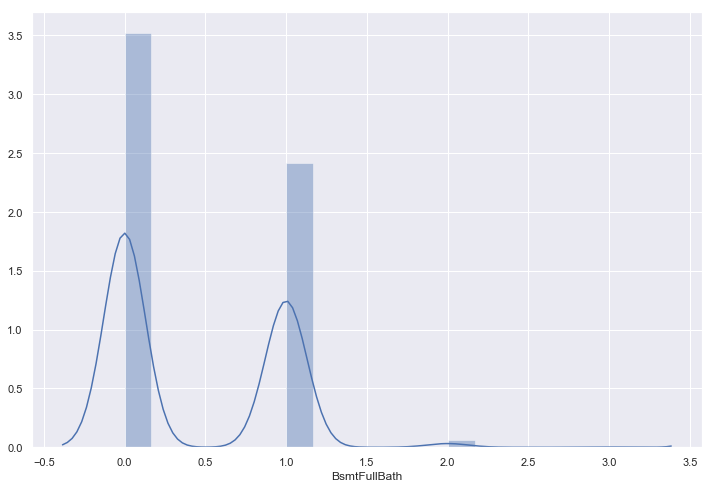

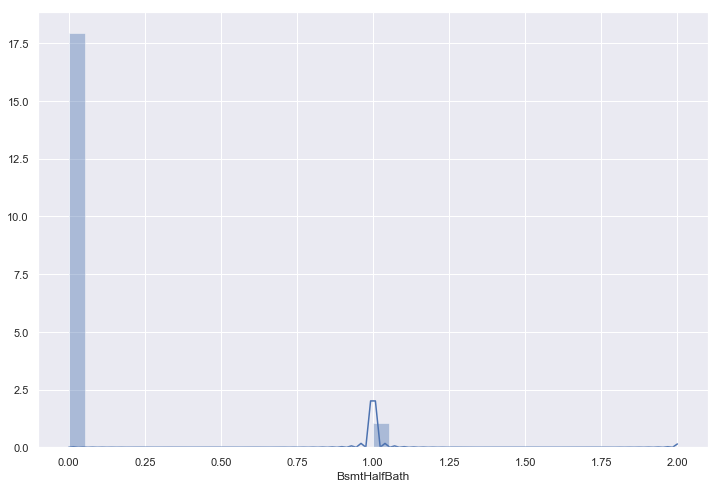

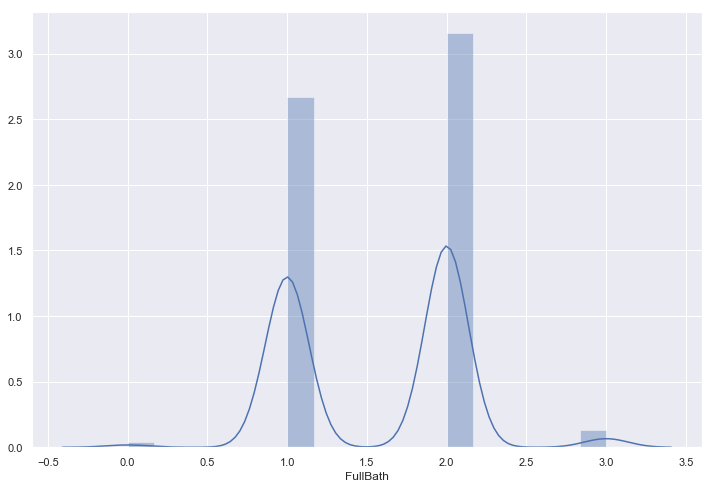

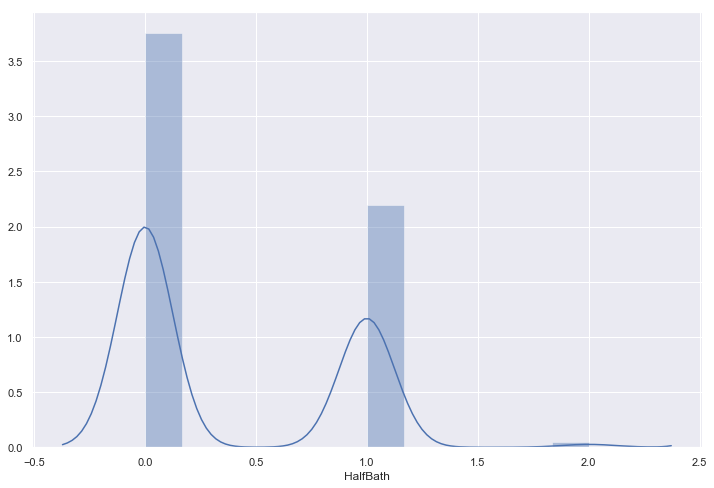

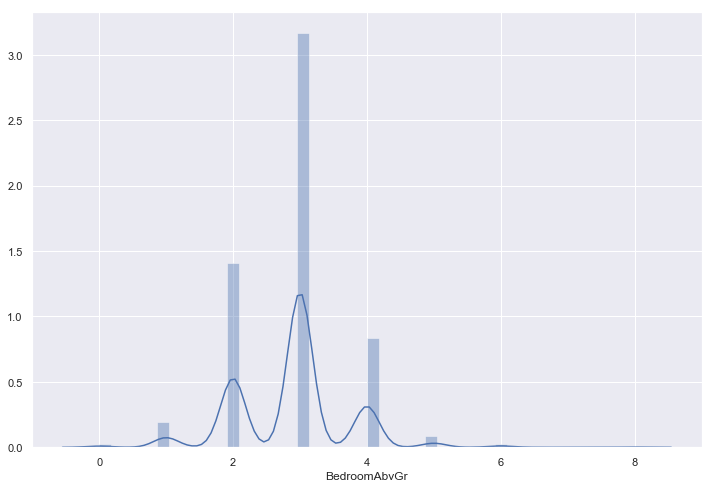

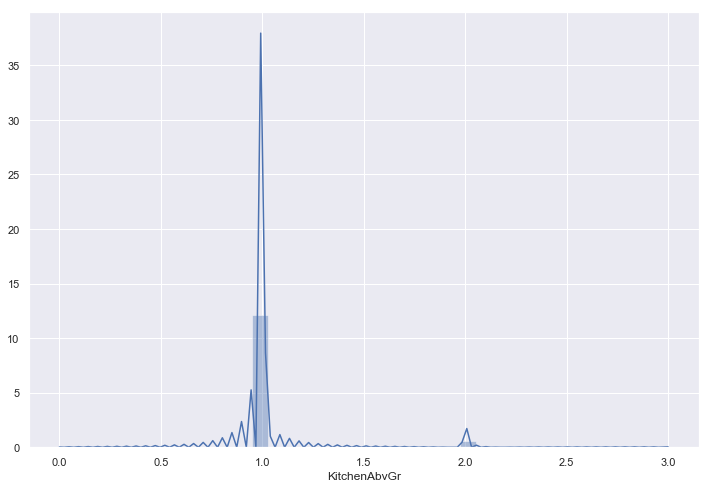

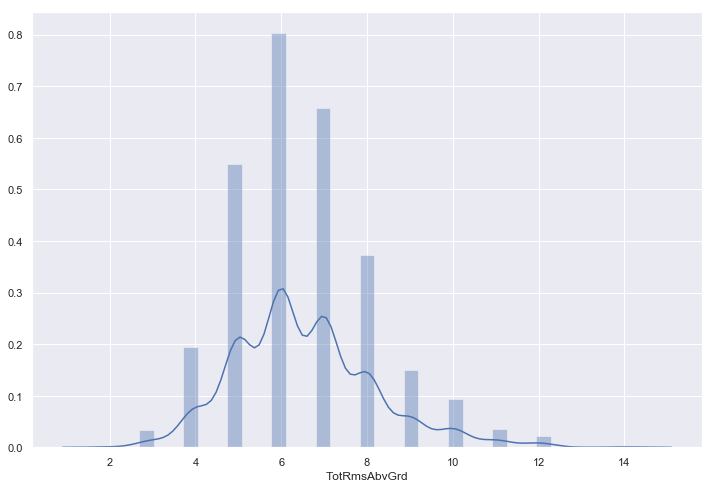

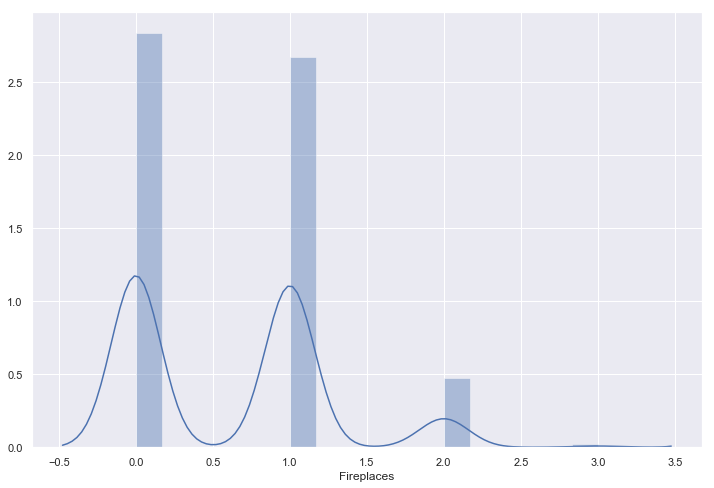

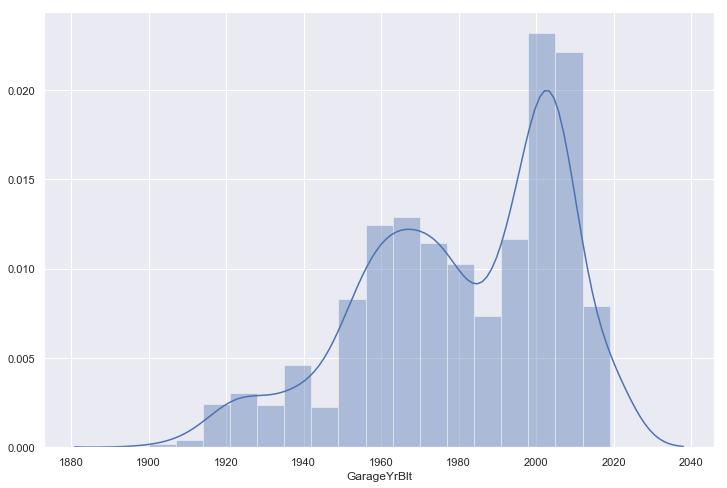

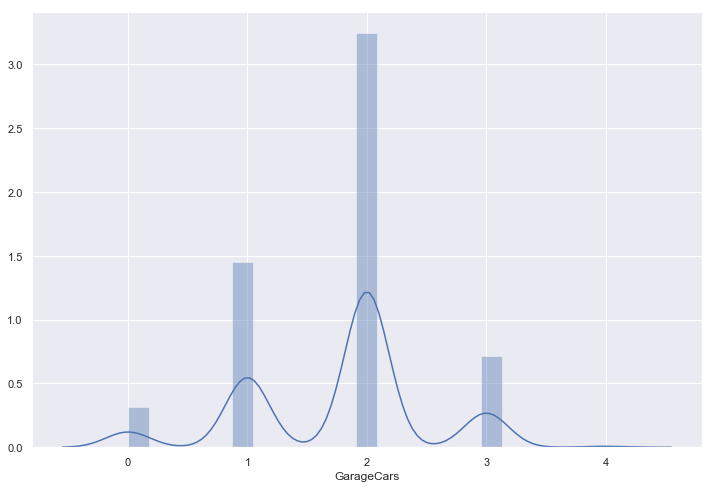

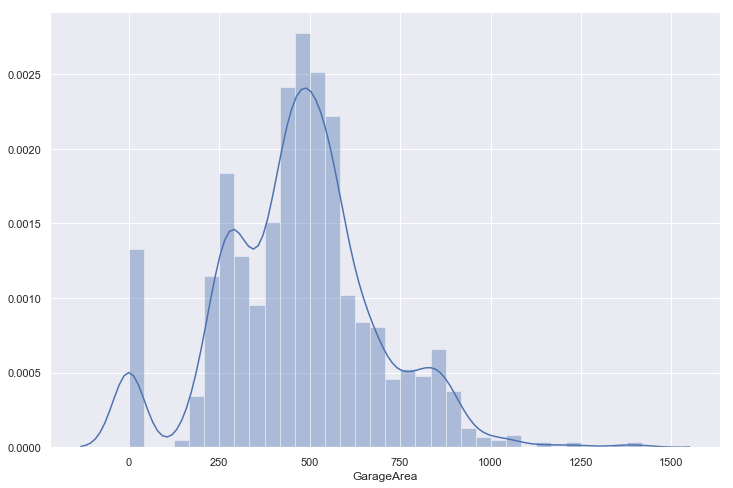

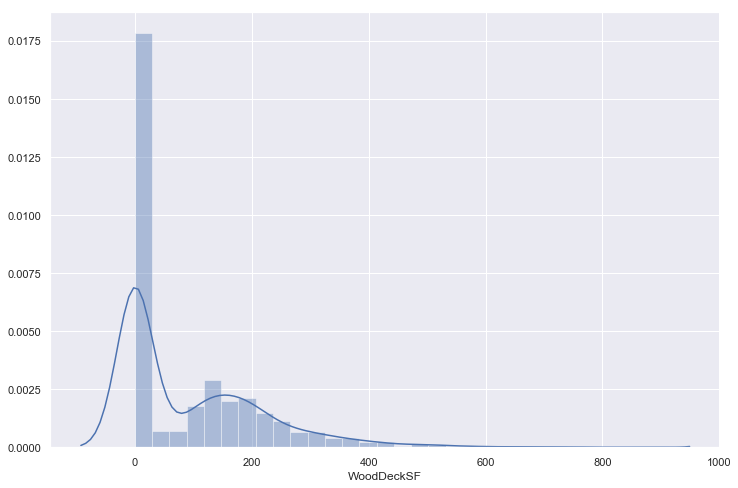

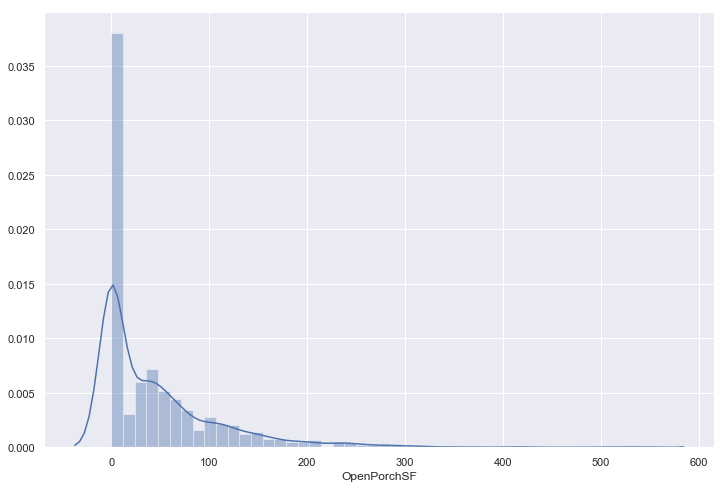

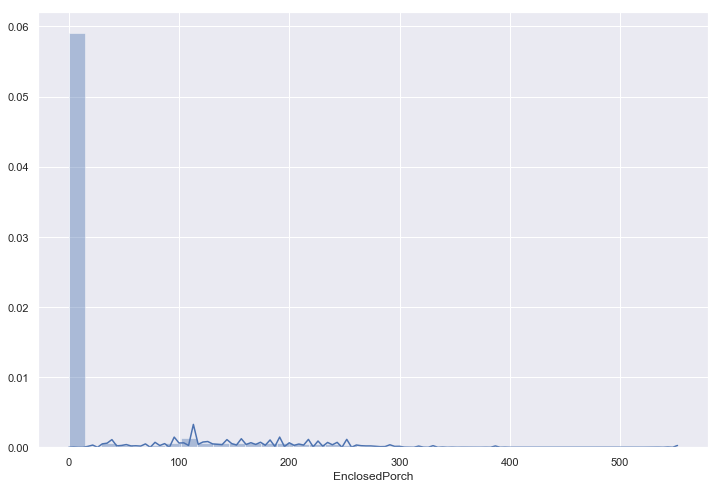

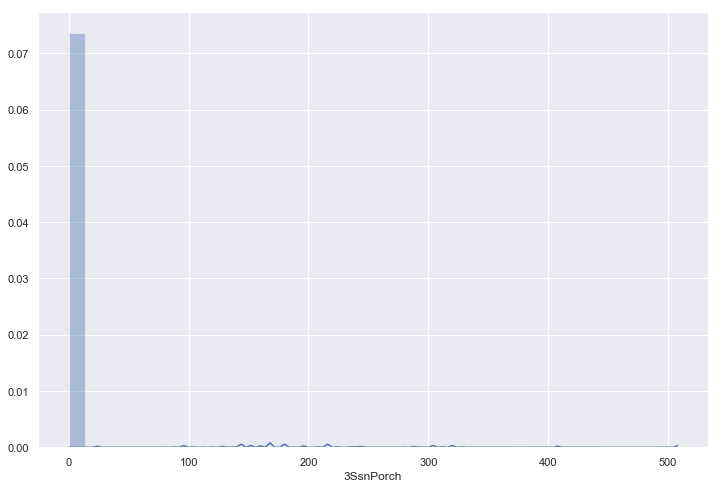

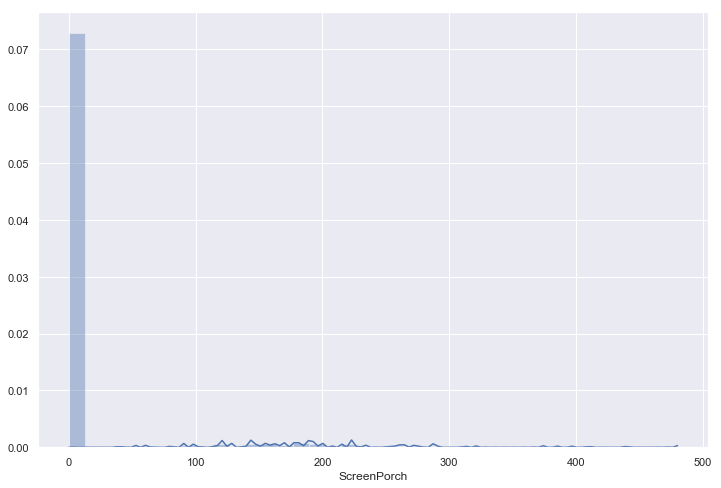

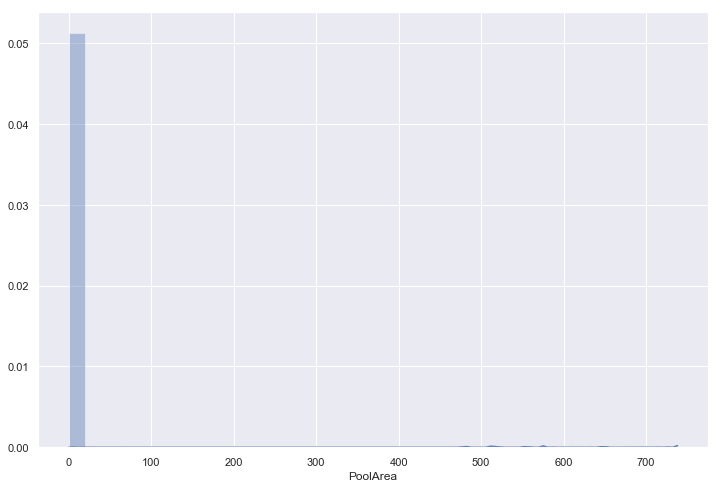

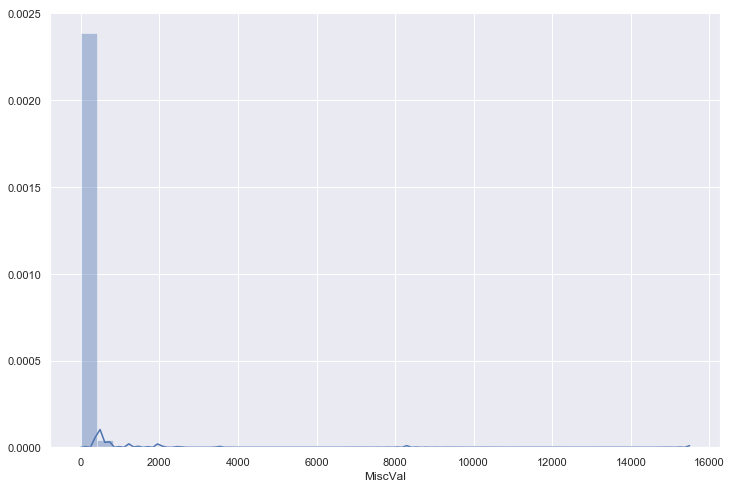

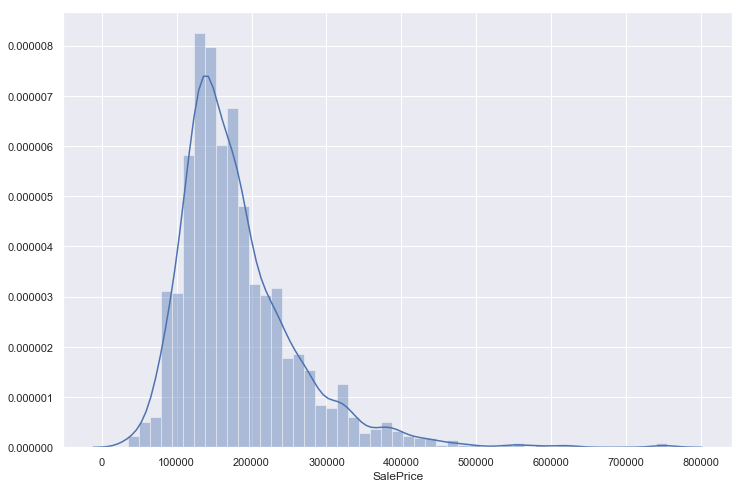

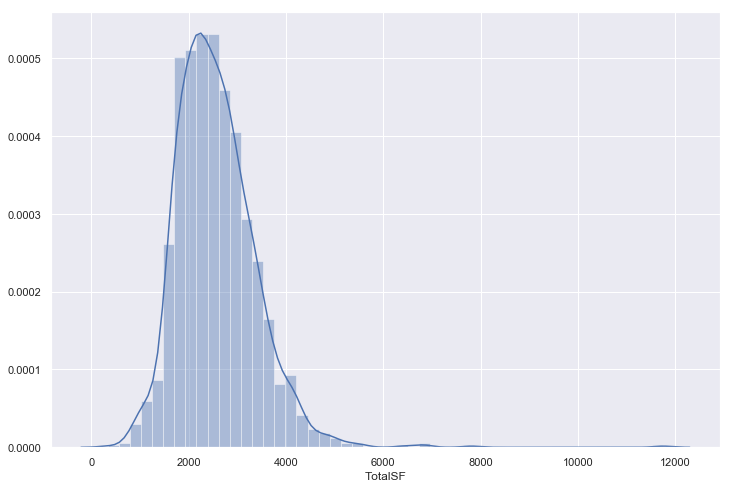

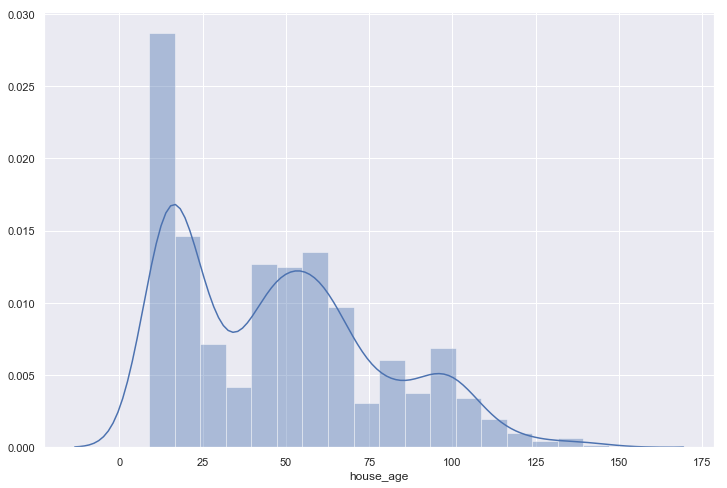

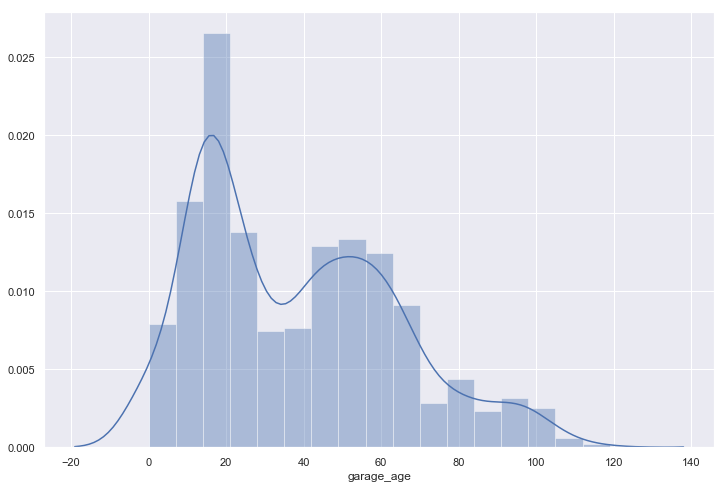

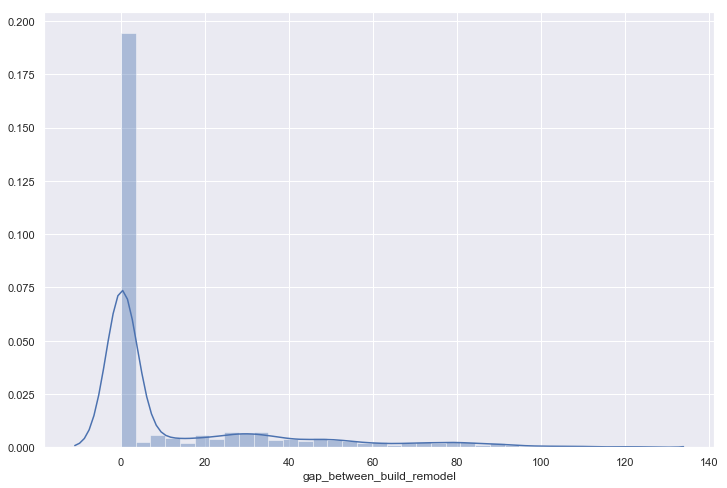

In [33]:
#lets plot distplot for all the numeric columns to observe there distribution and remove the redundant ones
for col in house_numeric.columns:
    plt.figure(figsize=(12,8))
    sns.distplot(house[col])

In [34]:
#These are the columns form the above distplot that doesnot follow normal distribution, lets drop few of them
#'GarageYrBlt','YearBuilt','YrSold','YearRemodAdd','MoSold','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','Fireplaces','GarageCars'
house_numeric.drop(['YearBuilt', 'YearRemodAdd','Fireplaces'], axis=1,inplace=True)
house_numeric.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,house_age,garage_age,gap_between_build_remodel
0,65.0,8450,7,196.0,706,0,150,856,856,854,...,0,0,0,0,0,208500,2566,16,16.0,0
1,80.0,9600,6,0.0,978,0,284,1262,1262,0,...,0,0,0,0,0,181500,2524,43,43.0,0
2,68.0,11250,7,162.0,486,0,434,920,920,866,...,0,0,0,0,0,223500,2706,18,18.0,1
3,60.0,9550,7,0.0,216,0,540,756,961,756,...,272,0,0,0,0,140000,2473,104,21.0,55
4,84.0,14260,8,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,0,250000,3343,19,19.0,0


In [35]:
house_numeric.shape

(1460, 34)

### Outlier Analysis

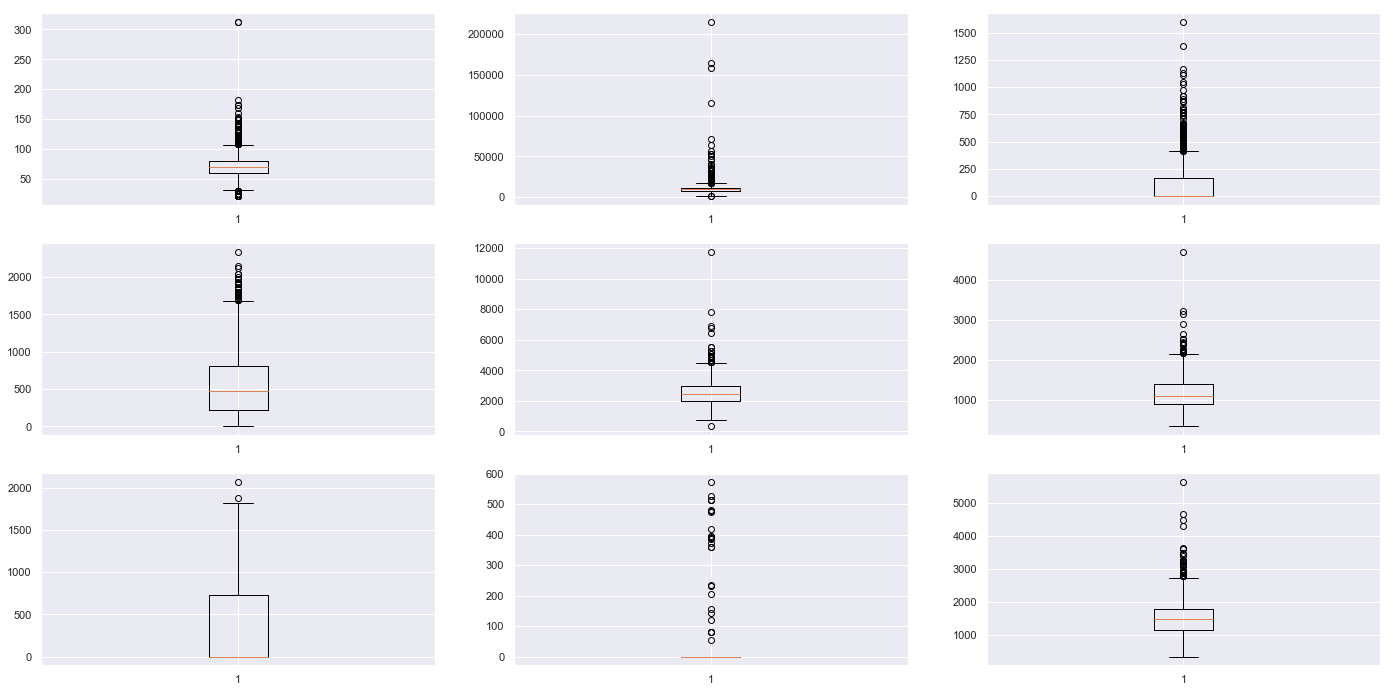

In [36]:
#boxplots for numeric varaibles
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(house.LotFrontage)
plt.subplot(3,3,2)
plt.boxplot(house.LotArea)
plt.subplot(3,3,3)
plt.boxplot(house.MasVnrArea)
plt.subplot(3,3,4)
plt.boxplot(house.BsmtUnfSF)
plt.subplot(3,3,5)
plt.boxplot(house.TotalSF)
plt.subplot(3,3,6)
plt.boxplot(house['1stFlrSF'])
plt.subplot(3,3,7)
plt.boxplot(house['2ndFlrSF'])
plt.subplot(3,3,8)
plt.boxplot(house.LowQualFinSF)
plt.subplot(3,3,9)
plt.boxplot(house.GrLivArea)
plt.show()

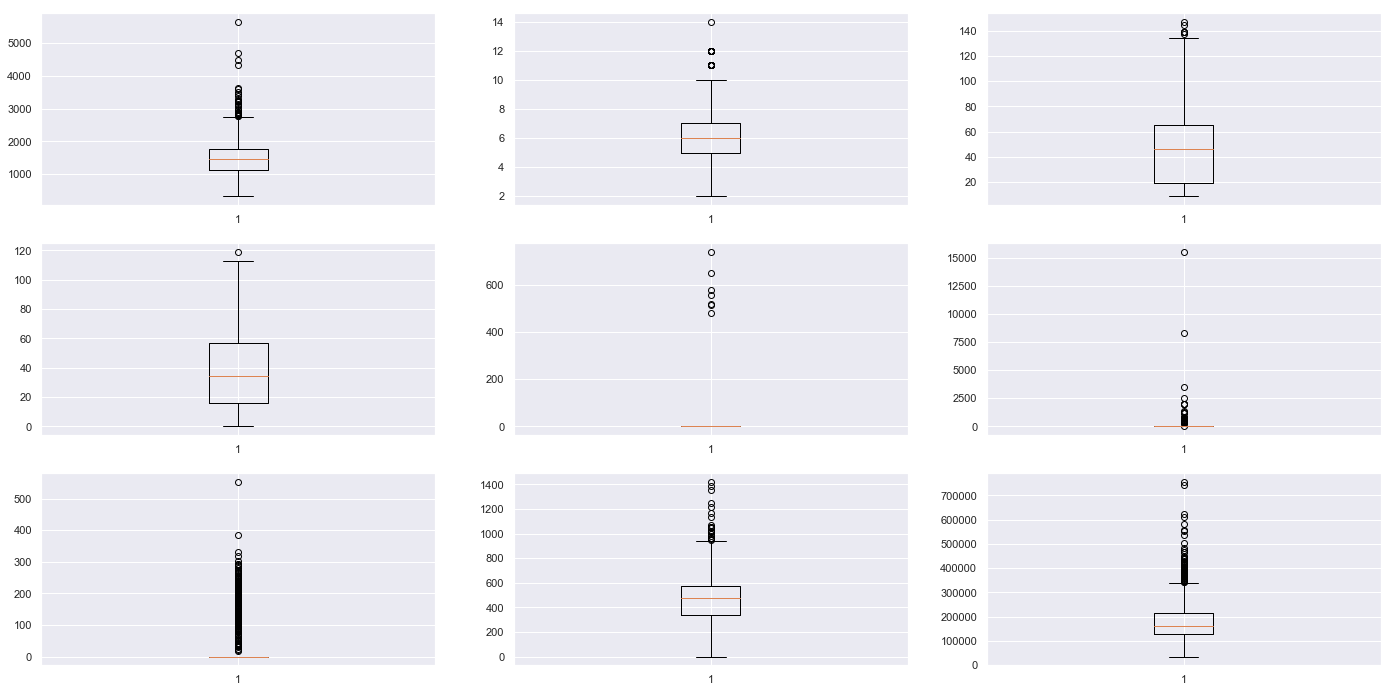

In [37]:
#boxplots for numeric variables
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(house.GrLivArea)
plt.subplot(3,3,2)
plt.boxplot(house.TotRmsAbvGrd)
plt.subplot(3,3,3)
plt.boxplot(house.house_age)
plt.subplot(3,3,4)
plt.boxplot(house.garage_age)
plt.subplot(3,3,5)
plt.boxplot(house.PoolArea)
plt.subplot(3,3,6)
plt.boxplot(house.MiscVal)
plt.subplot(3,3,7)
plt.boxplot(house.EnclosedPorch)
plt.subplot(3,3,8)
plt.boxplot(house.GarageArea)
plt.subplot(3,3,9)
plt.boxplot(house.SalePrice)
plt.show()

In [38]:
#since data available is very less we will treat the outliers only for few variables
# outlier treatment for LotFrontage
Q1 = house.LotFrontage.quantile(0.25)
Q3 = house.LotFrontage.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.LotFrontage >= Q1 - 1.5*IQR) & (house.LotFrontage <= Q3 + 1.5*IQR)]

In [39]:
# outlier treatment for LotArea
Q1 = house.LotArea.quantile(0.25)
Q3 = house.LotArea.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.LotArea >= Q1 - 1.5*IQR) & (house.LotArea <= Q3 + 1.5*IQR)]

In [40]:
Q1 = house.PoolArea.quantile(0.25)
Q3 = house.PoolArea.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.PoolArea >= Q1 - 1.5*IQR) & (house.PoolArea <= Q3 + 1.5*IQR)]

In [41]:
Q1 = house.MiscVal.quantile(0.25)
Q3 = house.MiscVal.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.MiscVal >= Q1 - 1.5*IQR) & (house.MiscVal <= Q3 + 1.5*IQR)]

In [42]:
house.shape

(1238, 84)

In [43]:
# split into X and y
X = house.drop(['SalePrice'], axis=1)
y = house['SalePrice']

### Converting the categorical columns by creating dummy variables

In [44]:
#replacing with binary values 
house["CentralAir"]=house["CentralAir"].map({'Y': 1, "N": 0})

In [45]:
#lets include the categorical columns
house_categorical_df=X.select_dtypes(include=['object'])

In [46]:
house_categorical_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [47]:
#creating dummy variables for categorical columns
house_df_dummies = pd.get_dummies(house_categorical_df, drop_first=True)
house_df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
# dropping the original categorical variables after creating dummies
X = X.drop(list(house_categorical_df.columns), axis=1)

In [49]:
# concat dummy variables with X
X = pd.concat([X, house_df_dummies], axis=1)

In [50]:
X.shape

(1238, 282)

In [51]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_var = X.columns
X[scale_var] = scaler.fit_transform(X[scale_var])

In [52]:
X.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,...,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03
mean,3.360263e-16,-2.174261e-16,-1.877873e-16,-1.439927e-15,4.138226e-15,-3.624815e-16,-4.708135e-17,2.351377e-16,-2.887656e-17,-4.752974e-17,...,9.227608e-16,-1.204386e-16,2.035708e-17,3.562489e-16,-8.474643e-17,-5.301136e-17,-6.625018e-17,-4.360630e-17,-8.313221e-17,2.824881e-17
std,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,...,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00
min,-2.526777e+00,-2.511377e+00,-3.716806e+00,-3.214596e+00,-1.674608e+00,-5.727946e-01,-1.017643e+00,-2.817893e-01,-1.300883e+00,-2.591724e+00,...,-5.693409e-02,-6.368006e-02,-3.075818e-01,-4.928641e-02,-2.515043e+00,-5.693409e-02,-8.557469e-02,-1.214664e-01,-2.121844e+00,-3.107179e-01
25%,-6.026365e-01,-6.168839e-01,-7.980583e-01,-6.207944e-01,-9.101314e-01,-5.727946e-01,-1.017643e+00,-2.817893e-01,-7.631490e-01,-6.025351e-01,...,-5.693409e-02,-6.368006e-02,-3.075818e-01,-4.928641e-02,3.976074e-01,-5.693409e-02,-8.557469e-02,-1.214664e-01,4.712882e-01,-3.107179e-01
50%,8.798940e-02,-2.558413e-02,-6.837132e-02,9.250109e-02,4.277023e-01,-5.727946e-01,-1.189992e-01,-2.817893e-01,-2.051871e-01,-1.483206e-01,...,-5.693409e-02,-6.368006e-02,-3.075818e-01,-4.928641e-02,3.976074e-01,-5.693409e-02,-8.557469e-02,-1.214664e-01,4.712882e-01,-3.107179e-01
75%,6.343106e-01,6.347407e-01,6.613157e-01,9.679092e-01,9.055000e-01,3.565129e-01,6.593536e-01,-2.817893e-01,5.252767e-01,5.483880e-01,...,-5.693409e-02,-6.368006e-02,-3.075818e-01,-4.928641e-02,3.976074e-01,-5.693409e-02,-8.557469e-02,-1.214664e-01,4.712882e-01,-3.107179e-01
max,2.627170e+00,2.655082e+00,2.850377e+00,1.259712e+00,1.192179e+00,8.720281e+00,4.143072e+00,9.490770e+00,3.949466e+00,5.301023e+00,...,1.756417e+01,1.570350e+01,3.251168e+00,2.028957e+01,3.976074e-01,1.756417e+01,1.168570e+01,8.232726e+00,4.712882e-01,3.218353e+00


### Model Builiding

In [53]:
# split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, 
                                                    test_size = 0.3, 
                                                    random_state = 100)

In [54]:
# let's build a Linear regression model first
from sklearn import metrics
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9474059560967034

In [55]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2.2096068554655688e+21

In [56]:
lm.intercept_

140498345149403.62

In [57]:
# model coefficients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 140498345149403.62),
 ('LotFrontage', 1108.473),
 ('LotArea', 7399.308),
 ('OverallQual', 9016.633),
 ('YearBuilt', -2.0819291930219904e+16),
 ('YearRemodAdd', 6647570184991530.0),
 ('MasVnrArea', 1864.676),
 ('BsmtFinSF1', 7555074018185074.0),
 ('BsmtFinSF2', 2687759747108619.0),
 ('BsmtUnfSF', 7928406940899377.0),
 ('TotalBsmtSF', -7510872699596725.0),
 ('1stFlrSF', -1738036575830383.0),
 ('2ndFlrSF', -2091181689587357.2),
 ('LowQualFinSF', -193512905026216.0),
 ('GrLivArea', 2035524884008419.2),
 ('BsmtFullBath', 424.375),
 ('BsmtHalfBath', 393.25),
 ('FullBath', 3901.25),
 ('HalfBath', 2758.125),
 ('BedroomAbvGr', -2282.5),
 ('KitchenAbvGr', -2689.75),
 ('TotRmsAbvGrd', 2541.5),
 ('Fireplaces', 3230.5),
 ('GarageYrBlt', 5537556789779081.0),
 ('GarageCars', 123.0),
 ('GarageArea', 5696.0),
 ('WoodDeckSF', 1368.5),
 ('OpenPorchSF', 1733.062),
 ('EnclosedPorch', 1635.0),
 ('3SsnPorch', 363.438),
 ('ScreenPorch', 2002.0),
 ('PoolArea', -187737610034873.06),
 ('MiscVal', -

It is clearly visible that the model is overfit since the tarining accracy is very high compared to test data

In [58]:
#Importing the lasso and ridge regressions
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [59]:
# lasso regression without tuning hyper parameter
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9474061456072166
0.9007925995047275


In [60]:
# lasso model parameters without tuning hyper parameter
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 179213.539),
 ('LotFrontage', 1140.625),
 ('LotArea', 7373.739),
 ('OverallQual', 9031.178),
 ('YearBuilt', 26832.404),
 ('YearRemodAdd', 1894.704),
 ('MasVnrArea', 1877.787),
 ('BsmtFinSF1', 18769.351),
 ('BsmtFinSF2', 4118.072),
 ('BsmtUnfSF', 12305.011),
 ('TotalBsmtSF', 7709.262),
 ('1stFlrSF', 13980.593),
 ('2ndFlrSF', 23172.146),
 ('LowQualFinSF', 1166.987),
 ('GrLivArea', 5121.079),
 ('BsmtFullBath', 432.51),
 ('BsmtHalfBath', 397.667),
 ('FullBath', 3900.782),
 ('HalfBath', 2751.486),
 ('BedroomAbvGr', -2280.816),
 ('KitchenAbvGr', -2673.69),
 ('TotRmsAbvGrd', 2538.144),
 ('Fireplaces', 3244.335),
 ('GarageYrBlt', -10648.904),
 ('GarageCars', 126.778),
 ('GarageArea', 5691.202),
 ('WoodDeckSF', 1362.02),
 ('OpenPorchSF', 1744.175),
 ('EnclosedPorch', 1629.327),
 ('3SsnPorch', 361.827),
 ('ScreenPorch', 2006.373),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('TotalSF', -10358.139),
 ('house_age', 12969.489),
 ('garage_age', -9653.456),
 ('gap_between_build_remodel', 34

lets tune the hyperparameter

In [61]:
# Now let's do k fold with r2 score and tune hyper parameter
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   13.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [62]:
# results data frame 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.122915,0.015682,0.001598,0.001957,0.0001,{'alpha': 0.0001},0.911894,0.842091,0.847263,0.867784,...,0.877897,0.032477,27,0.948438,0.956724,0.956439,0.950723,0.947781,0.952021,0.003851
1,0.109376,0.009870,0.003124,0.006248,0.001,{'alpha': 0.001},0.911896,0.842090,0.847268,0.867788,...,0.877900,0.032476,26,0.948438,0.956724,0.956439,0.950723,0.947781,0.952021,0.003851
2,0.100004,0.007643,0.000000,0.000000,0.01,{'alpha': 0.01},0.911925,0.842084,0.847297,0.867818,...,0.877916,0.032477,25,0.948438,0.956724,0.956439,0.950723,0.947781,0.952021,0.003851
3,0.103121,0.007671,0.000000,0.000000,0.05,{'alpha': 0.05},0.912048,0.842055,0.847423,0.867948,...,0.877987,0.032478,24,0.948438,0.956724,0.956438,0.950723,0.947781,0.952021,0.003851
4,0.110420,0.011544,0.002451,0.002002,0.1,{'alpha': 0.1},0.912176,0.842018,0.847523,0.868087,...,0.878054,0.032487,23,0.948438,0.956724,0.956438,0.950723,0.947781,0.952021,0.003851


In [63]:
model_cv.best_params_

{'alpha': 200}

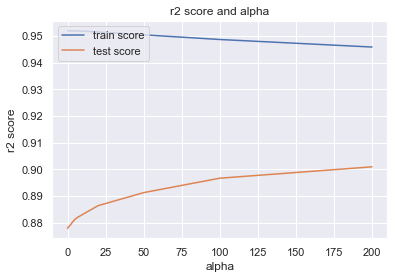

In [64]:
#plotting the values of r2 score to choose the optimal value of alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [65]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   13.5s finished
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [66]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.117194,0.011861,0.003925,0.006051,0.0001,{'alpha': 0.0001},-15666.467547,-19652.390958,-20430.876914,-16502.249047,...,-17715.537955,1933.738951,27,-11016.426599,-10510.984242,-10623.413432,-11195.454121,-10827.710183,-10834.797715,250.060316
1,0.104895,0.015222,0.003117,0.006233,0.001,{'alpha': 0.001},-15666.119880,-19652.406596,-20430.307642,-16501.976148,...,-17715.307553,1933.687375,26,-11016.425303,-10510.976786,-10623.409855,-11195.449634,-10827.708844,-10834.794084,250.061377
2,0.108513,0.002712,0.000000,0.000000,0.01,{'alpha': 0.01},-15662.631365,-19652.562065,-20427.800646,-16499.626971,...,-17713.715865,1934.018724,25,-11016.410994,-10510.919021,-10623.375113,-11195.404480,-10827.722034,-10834.766328,250.067034
3,0.104800,0.003918,0.002401,0.001960,0.05,{'alpha': 0.05},-15647.156599,-19653.251321,-20416.481010,-16489.204024,...,-17706.600607,1935.456903,24,-11016.447976,-10510.698807,-10623.246536,-11195.267256,-10827.772050,-10834.686525,250.111339
4,0.105623,0.007756,0.003118,0.006235,0.1,{'alpha': 0.1},-15632.673399,-19654.113375,-20406.023042,-16476.685747,...,-17699.541944,1937.195348,23,-11016.578442,-10510.509850,-10623.126886,-11195.115843,-10827.813748,-10834.628954,250.155623


In [67]:
model_cv.best_params_

{'alpha': 200}

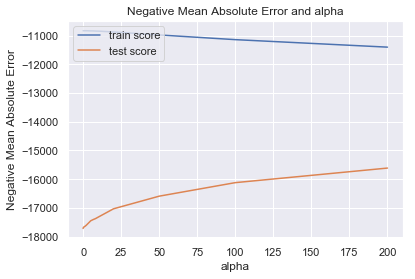

In [68]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [69]:
# model with optimal alpha = 200
lm = Lasso(alpha=200)
lm.fit(X_train, y_train)


# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.941828259003052
0.9194833870877548


In [70]:
# lasso model parameters with alpha = 200
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
final_var=dict(zip(cols, model_parameters))
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'KitchenQual_TA': -9916.505,
 'KitchenQual_Gd': -9720.167,
 'ExterQual_TA': -9299.277,
 'ExterQual_Gd': -9134.669,
 'BsmtQual_Gd': -7942.617,
 'BsmtQual_TA': -6340.661,
 'KitchenAbvGr': -3350.355,
 'MSSubClass_90': -2995.013,
 'OverallCond_5': -2781.818,
 'OverallCond_3': -2460.714,
 'KitchenQual_Fa': -2407.147,
 'BedroomAbvGr': -2285.5,
 'Neighborhood_Edwards': -1830.993,
 'SaleCondition_Family': -1713.241,
 'Condition1_RRAe': -1656.295,
 'LandContour_Low': -1651.712,
 'MSSubClass_160': -1561.072,
 'GarageType_Basment': -1529.659,
 'MSSubClass_120': -1447.241,
 'house_age': -1390.242,
 'OverallCond_4': -1315.153,
 'BldgType_Twnhs': -1295.176,
 'RoofMatl_Tar&Grv': -1290.114,
 'Exterior2nd_HdBoard': -1230.637,
 'Neighborhood_NWAmes': -1187.049,
 'GarageType_Attchd': -1175.587,
 'BsmtExposure_No': -1154.063,
 'LotConfig_FR2': -1143.764,
 'MoSold_2': -1115.757,
 'MSSubClass_80': -1073.747,
 'BsmtFinType1_Rec': -1061.871,
 'Neighborhood_OldTown': -1010.925,
 'HeatingQC_Gd': -983.513,
 'Ex

With optimal value of alpha=200 we got r2 values for training and test data as 0.94 and 0.91 which is good indication that model is not overfit

### Ridge regression

In [71]:
# ridge regression without tuning hyper parameter
lm = Ridge(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9474065249348123
0.9006820456820733


In [72]:
# Now let's do k fold with r2 score and tune hyper parameter
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [73]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009610,0.001971,0.003190,0.001595,0.001,{'alpha': 0.001},0.864629,0.872066,0.900071,0.860184,...,0.878900,0.016729,5,0.952299,0.952416,0.950014,0.951079,0.953412,0.951844,0.001177
1,0.007999,0.002523,0.001600,0.001960,0.01,{'alpha': 0.01},0.864671,0.872130,0.900124,0.860292,...,0.878956,0.016710,4,0.952299,0.952416,0.950014,0.951079,0.953412,0.951844,0.001177
2,0.008003,0.002526,0.001599,0.001959,1,{'alpha': 1.0},0.867451,0.877558,0.903184,0.866276,...,0.882699,0.015605,3,0.952214,0.952323,0.949951,0.950980,0.953329,0.951759,0.001172
3,0.007200,0.001601,0.000800,0.001600,5,{'alpha': 5.0},0.872100,0.887529,0.907125,0.874464,...,0.888590,0.014084,2,0.951755,0.951596,0.949387,0.950394,0.952743,0.951175,0.001165
4,0.008809,0.003920,0.000787,0.001574,10,{'alpha': 10.0},0.875217,0.893204,0.908789,0.878993,...,0.891866,0.013120,1,0.951186,0.950738,0.948710,0.949709,0.952014,0.950471,0.001153


In [74]:
model_cv.best_params_

{'alpha': 10.0}

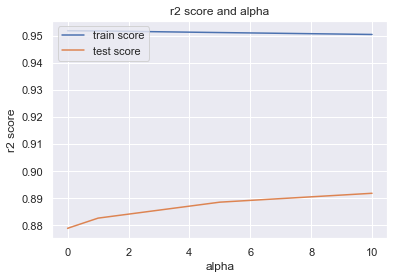

In [75]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [76]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [77]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012501,0.011694,0.000000,0.000000,0.001,{'alpha': 0.001},-18630.132962,-19207.249895,-17031.636378,-17390.356033,...,-17901.968768,858.134120,5,-10672.251797,-10608.187066,-10796.484396,-11141.985726,-10675.085578,-10778.798912,191.538290
1,0.003125,0.006249,0.003128,0.006256,0.01,{'alpha': 0.01},-18629.035596,-19202.770676,-17028.467350,-17382.952709,...,-17898.115967,858.590103,4,-10672.003552,-10607.954412,-10796.317046,-11141.866609,-10675.007088,-10778.629742,191.567601
2,0.009373,0.007653,0.000000,0.000000,1,{'alpha': 1.0},-18419.925953,-18802.345599,-16820.095293,-16916.229245,...,-17589.789227,845.043259,3,-10679.273309,-10596.842186,-10777.426744,-11164.718456,-10678.734555,-10779.399050,200.977834
3,0.006252,0.007657,0.000000,0.000000,5,{'alpha': 5.0},-17949.304208,-18039.836154,-16539.797489,-16209.234832,...,-17084.766803,759.922572,2,-10754.872361,-10635.083428,-10814.734704,-11228.356912,-10707.291555,-10828.067792,208.612841
4,0.006250,0.007655,0.000000,0.000000,10,{'alpha': 10.0},-17708.729841,-17561.909922,-16323.052664,-15907.118783,...,-16798.403859,711.544262,1,-10843.073030,-10705.360414,-10901.568523,-11292.199284,-10747.912210,-10898.022692,208.834448


In [78]:
model_cv.best_params_

{'alpha': 10.0}

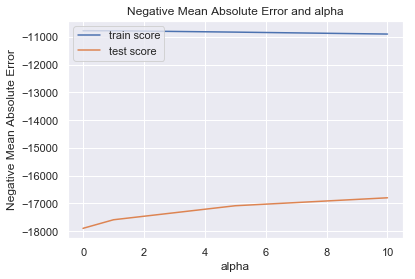

In [79]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [105]:
# model with optimal alpha = 10
# ridge regression
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9445110204167058
0.9132677230470666


Builing the Ridge regression after variable shrinkage done by lasso

In [81]:
# Only the variables with no zero coefficient values are selected
X_new=cols.drop(['LotFrontage','BsmtUnfSF','1stFlrSF','BsmtFullBath','GarageYrBlt','GarageArea','PoolArea','MiscVal','gap_between_build_remodel',
          'MSSubClass_50','MSSubClass_60','MSSubClass_190','Alley_Pave','Neighborhood_MeadowV','Neighborhood_SWISU','Neighborhood_SawyerW','Condition2_Norm',
          'Condition2_RRAn','Condition2_PosA','BldgType_TwnhsE','HouseStyle_1Story','HouseStyle_SLvl','OverallCond_6','RoofStyle_Hip','RoofMatl_Roll','Exterior1st_AsphShn','Exterior1st_Stucco',
'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd','Exterior2nd_Plywood','MasVnrType_none','ExterCond_TA','BsmtQual_No Basement','BsmtCond_Gd','BsmtCond_Po','BsmtCond_No Basement','BsmtExposure_No Basement','BsmtFinType1_No Basement','BsmtFinType1_No Basement',
'BsmtFinType2_GLQ','BsmtFinType2_No Basement','Functional_Min1','FireplaceQu_Gd','GarageType_Attchd','GarageType_CarPort','GarageFinish_No Garage','GarageQual_Gd','GarageQual_No Garage','GarageCond_No Garage','MiscFeature_Shed','MiscFeature_none','SaleType_ConLD','SaleType_ConLw','SaleType_New'     ])

In [82]:
#lets look at the length of the variables after elimination by lasso regression
len(X_new)

230

In [83]:
#lets move the varibles in to a list
reduced_cols=list(X_new)
#removing the constant 
reduced_cols.remove('constant')

In [84]:
#creating the dataframe of the varibles extracted above
X_NEW=X[reduced_cols]

In [85]:
X_NEW.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,2ndFlrSF,LowQualFinSF,...,SaleType_CWD,SaleType_Con,SaleType_ConLI,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.308988,0.661316,1.032754,0.857720,0.565607,0.647560,-0.281789,-0.484365,1.225510,-0.112001,...,-0.056934,-0.040226,-0.056934,-0.049286,0.397607,-0.056934,-0.085575,-0.121466,0.471288,-0.310718
1,0.100709,-0.068371,0.157346,-0.432334,-0.572795,1.289112,-0.281789,0.515153,-0.778503,-0.112001,...,-0.056934,-0.040226,-0.056934,-0.049286,0.397607,-0.056934,-0.085575,-0.121466,0.471288,-0.310718
2,0.688536,0.661316,0.967909,0.809940,0.368129,0.128659,-0.281789,-0.326806,1.253669,-0.112001,...,-0.056934,-0.040226,-0.056934,-0.049286,0.397607,-0.056934,-0.085575,-0.121466,0.471288,-0.310718
3,0.082897,0.661316,-1.820428,-0.719012,-0.572795,-0.508176,-0.281789,-0.730552,0.995541,-0.112001,...,-0.056934,-0.040226,-0.056934,-0.049286,0.397607,-0.056934,-0.085575,-0.121466,-2.121844,-0.310718
4,1.760873,1.391003,0.935487,0.714381,1.460066,0.527270,-0.281789,0.227114,1.692487,-0.112001,...,-0.056934,-0.040226,-0.056934,-0.049286,0.397607,-0.056934,-0.085575,-0.121466,0.471288,-0.310718


In [86]:
# Split test and train again using new X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_NEW, y, train_size=0.7,
                                                    test_size = 0.3, 
                                                    random_state = 100)

In [87]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [88]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009372,0.007652,0.003125,0.006250,0.001,{'alpha': 0.001},0.880650,0.893338,0.906936,0.889463,...,0.895352,0.010130,5,0.949570,0.948853,0.947218,0.947277,0.950584,0.948700,0.001308
1,0.006257,0.007663,0.000000,0.000000,0.01,{'alpha': 0.01},0.880655,0.893365,0.906950,0.889468,...,0.895364,0.010132,4,0.949570,0.948853,0.947218,0.947277,0.950584,0.948700,0.001308
2,0.007305,0.005481,0.000801,0.001602,1,{'alpha': 1.0},0.881244,0.895818,0.908175,0.889924,...,0.896441,0.010261,3,0.949560,0.948826,0.947196,0.947264,0.950564,0.948682,0.001308
3,0.007198,0.002992,0.001600,0.001960,5,{'alpha': 5.0},0.883329,0.901379,0.910825,0.891216,...,0.899051,0.010437,2,0.949402,0.948508,0.946939,0.947108,0.950295,0.948450,0.001296
4,0.009623,0.001984,0.001601,0.001961,10,{'alpha': 10.0},0.885386,0.904986,0.912394,0.892365,...,0.900850,0.010316,1,0.949080,0.947990,0.946538,0.946822,0.949820,0.948050,0.001264


In [89]:
model_cv.best_params_

{'alpha': 10.0}

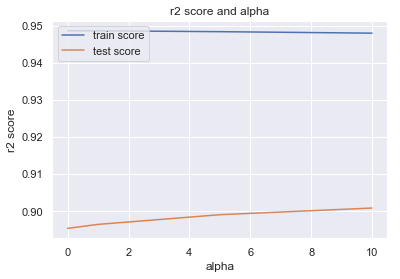

In [90]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [91]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [92]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008821,0.004696,0.003197,0.001599,0.001,{'alpha': 0.001},-17533.500979,-17268.082017,-16814.731600,-15386.994420,...,-16611.386387,792.513513,5,-11119.076937,-11041.076096,-11173.013795,-11722.379121,-11020.696813,-11215.248552,259.384114
1,0.007994,0.002539,0.001600,0.001960,0.01,{'alpha': 0.01},-17533.043214,-17265.931842,-16813.612014,-15386.640710,...,-16610.421211,792.208668,4,-11119.060020,-11040.946581,-11172.895200,-11722.371015,-11020.660364,-11215.186636,259.408926
2,0.005612,0.001955,0.000000,0.000000,1,{'alpha': 1.0},-17488.987110,-17086.535172,-16697.949167,-15350.949875,...,-16521.212513,768.912145,3,-11118.500067,-11033.046973,-11165.431196,-11721.995808,-11017.493895,-11211.293588,261.098039
3,0.004001,0.000002,0.001600,0.001959,5,{'alpha': 5.0},-17351.359629,-16683.968282,-16359.515445,-15277.432469,...,-16304.998412,708.639078,2,-11143.462671,-11044.682471,-11178.644277,-11746.015469,-11039.639329,-11230.488844,263.429938
4,0.004796,0.001628,0.000791,0.001583,10,{'alpha': 10.0},-17231.498296,-16432.918105,-16068.817292,-15220.283839,...,-16152.444173,670.158018,1,-11188.720056,-11087.644048,-11221.380888,-11777.380751,-11079.356308,-11270.896410,259.229692


In [93]:
model_cv.best_params_

{'alpha': 10.0}

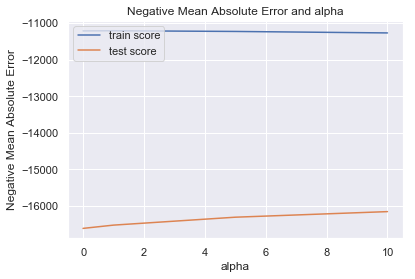

In [94]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [101]:
# model with optimal alpha = 10
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9445110204167058
0.9132677230470666


In [102]:
#lets create a dictionary with coeffiecients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
final_var=dict(zip(cols, model_parameters))

In [103]:
#sort the dict
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'Exterior1st_CBlock': -10065.082,
 'Exterior1st_CemntBd': -9693.783,
 'Foundation_Wood': -9539.909,
 'BsmtQual_Fa': -9502.941,
 'Exterior1st_WdShing': -8367.676,
 'WoodDeckSF': -6764.898,
 'Exterior2nd_AsphShn': -6705.769,
 'Condition1_RRAn': -4146.097,
 'Condition1_PosN': -3569.275,
 'Exterior2nd_Wd Sdng': -3234.387,
 'BsmtFullBath': -2962.462,
 'Foundation_Stone': -2907.3,
 'HouseStyle_1Story': -2885.165,
 'BsmtHalfBath': -2827.872,
 'Neighborhood_Timber': -2818.285,
 'OverallCond_2': -2688.256,
 'LandContour_Low': -2639.59,
 'Exterior2nd_VinylSd': -2284.023,
 'LotConfig_Inside': -2258.187,
 'OverallCond_3': -2212.995,
 'Condition1_RRAe': -2154.322,
 'Neighborhood_Veenker': -2154.123,
 'Heating_Wall': -2123.907,
 'HouseStyle_2.5Fin': -2074.767,
 'MSSubClass_180': -2026.0,
 'HouseStyle_SFoyer': -2021.918,
 'garage_age': -2002.422,
 'Neighborhood_SawyerW': -2002.422,
 'Electrical_Mix': -1989.361,
 'Exterior2nd_Stucco': -1961.846,
 'HeatingQC_TA': -1945.667,
 'gap_between_build_remodel

#### These are the top features in the ridge regression after using the non zero coefficient variables from the lasso regression.

GrLivArea,
LotFrontage,
OverallQual,
LotArea,
GarageArea,
Neighborhood_Crawfor,
MSSubClass_45,
MasVnrArea,
1stFlrSF,
ExterQual,
Exterior1st_CBlock,
Exterior1st_CemntBd,
Foundation_Stone,
Foundation_Wood,
Exterior1st_WdShing,
WoodDeckSF,
Exterior2nd_AsphShn,
GarageType_Basment,
Exterior2nd_BrkFace,


With optimal value of alpha = 10 for ridge regression on variables selected by lasso regession, we got following score for train and test data set. R2 for train : 0.9445110204167058 R2 for test : 0.9132677230470666 

This score looks good and we can conclude that model is not overfitting. And this score is pretty close to previous ridge regression model.

Optimal value of alpha of lasso regression is 200 and r2 score for optimal value of alpha is given below R2 score for train : 0.941828259003052 R2 score for test : 0.9194833870877548

Optimal value of alpha of ridge regression is 10 and r2 score for optimal value of alpha is given below R2 score for train : 0.9464820405083926 R2 score for test : 0.9075797172829855 

Optimal value of alpha is 10 for ridge regression on variables selected by lasso regession and r2 score for optimal value of alpha is given below R2 score for train : 0.9445110204167058 R2 score for test : 0.9132677230470666 Lasso has successfully reduced variables by shrinking the variable coefficient to 0.
